# NHL 2009-2018 Draft data

Dataset downloaded from [Kaggle](http://localhost:8888/?token=b1eb61f8ed72cf51005640919abafb625e74268313819ce3).

# Hypothesis testing

This notebook presents hypothesis testing performed on the modified NHL 2009-2018 Draft dataset.

Previous steps included data cleaning and feature extraction. Summary of each step is presented below, for details see notebook `notebooks/feature_extraction/nhl_cleanup_extraction.ipynb`.

Cleanup summary:

* summarized positions
    * corrected for consistency
    * C/RW, C/LW, _etc._, C/W, F = C
    * L/RW, W = RW
    * player who can play center are assumed to be centers for the purposes of this analysis
    * universal (left/right) wingers are assumed to be right wingers
    * for details, see notebook `notebooks/feature_extraction/nhl_cleanup_extraction.ipynb`

New features added during feature extraction:

* `year`: int, year of NHL draft, extracted from .csv file names
* `num_teams`: int, number of teams in each draft year
* `round_ratio`: float, ratio of each pick: 
    * $\text{round_ratio}=\large{\frac{\text{# Overall}}{\text{number of teams}}}$ 
    * number of teams represents number of picks per round
    * each overall pick number (e.g., 171) is divided by the number of picks per round to determine in which round (and how late in the round, via the ratio) was each prospect selected
    * \- 1 is needed to ensure proper boundary between rounds
    * so, for example, for pick #171 $\text{round ratio}=\frac{171 - 1}{30} = 5.67$
* `round`: int, round in which a prospect was selected
    * `round_ratio` is rounded down and 1 is added
    * $\text{round} = \text{int}(\text{round ratio}) + 1$
* `1st_round`: boolean, whether the prospect was selected in the $1^{st}$ round
    * one-hot encoding for $1^{st}$ round picks
    * True if `round` == 1, False otherwise
* `gpg`: float, average goals per game
* `apg`: float, average assists per game
* `ppg`: float, average points per game
* for details, see notebook `notebooks/feature_extraction/nhl_cleanup_extraction.ipynb`

## Load data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from time import time
sns.set()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [3]:
draft_data_path = '../../data/nhl_draft_picks_2009-2018.csv'
t = time()
df = pd.read_csv(draft_data_path)
df = df.rename(columns={'Unnamed: 0': 'id'})
elapsed = time() - t
print("----- DataFrame with NHL Draft Data loaded"
      "\nin {0:.2f} seconds".format(elapsed) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(df.shape[0], df.shape[1]) + 
      "\n-- Column names:\n", df.columns)

----- DataFrame with NHL Draft Data loaded
in 0.06 seconds
with 2,119 rows
and 32 columns
-- Column names:
 Index(['id', 'Overall', 'Team', 'Player', 'Nat.', 'Pos', 'Age', 'To',
       'Amateur Team', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'GP.1', 'W', 'L',
       'T/O', 'SV%', 'GAA', 'year', 'num_teams', 'round_ratio', 'round',
       '1st_round', 'gpg', 'apg', 'ppg', 'name', 'alias', 'league'],
      dtype='object')


## $H_1$: $1^{st}$ round picks tend to have more goals and assists

Let $H_1$ be the hypothesis that $1^{st}$ round draft picks have more goals and assists than the general population of all draft picks.

Then, $H_0$ is the null-hypothesis stating that there is no relationship between the player being picked in the $1^{st}$ round, and his number of goals and assists.

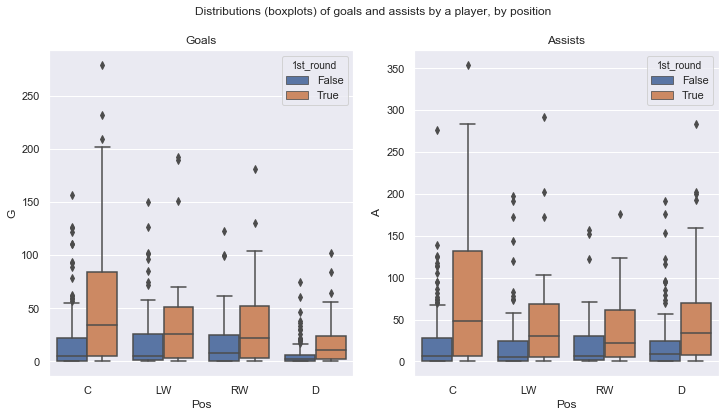

In [4]:
mask = df['Pos'] != 'G'
pos_order = ["C", "LW", "RW", "D"]

f, axes = plt.subplots(nrows=1, ncols=2,
                     figsize=(12, 6))
f.suptitle("Distributions (boxplots) of goals and assists by a player, by position")
sns.boxplot(data=df[mask], x='Pos', y='G',
            order=pos_order, hue='1st_round',
            ax=axes[0])
axes[0].set_title("Goals")

sns.boxplot(data=df[mask], x='Pos', y='A',
            order=pos_order, hue='1st_round',
            ax=axes[1])
axes[1].set_title("Assists");